# Loan Default Prediction(Decision_Tree VS Logistic Regression)

### Financial institutions face challenges in accurately assessing credit risk before approving loans. A high rate of loan defaults can result in financial losses for lenders. This project aims to build a predictive model using machine learning techniques to classify borrowers as either likely to default or unlikely to default, based on financial indicators such as Annual Income,Credit Score.By leveraging Logistic Regression and Decision Tree Classifiers, this project seeks to enhance the accuracy of credit risk assessments, reducing financial losses and improving lending decisions.

## Loading Necessary Libraries

In [11]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline


warnings.simplefilter(action="ignore", category=FutureWarning)

## Exploring the data

In [12]:
df=pd.read_csv("train.csv")
df.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [13]:
df.columns

Index(['Id', 'Home Ownership', 'Annual Income', 'Years in current job',
       'Tax Liens', 'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [15]:
df.select_dtypes("number").isna().sum()/len(df)

,0
Id,0.000000
Annual Income,0.207600
Tax Liens,0.000000
Number of Open Accounts,0.000000
Years of Credit History,0.000000
Maximum Open Credit,0.000000
Number of Credit Problems,0.000000
Months since last delinquent,0.544133
Bankruptcies,0.001867
Current Loan Amount,0.000000


In [16]:
df.select_dtypes("number").corr()

,Id,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Id,1.000000,0.011426,0.003393,0.004145,-0.009556,-0.022672,0.008264,0.007262,0.003183,-0.008485,-0.015758,0.005590,0.036498,0.012858
Annual Income,0.011426,1.000000,0.066245,0.188524,0.186531,0.062218,-0.015407,-0.101787,-0.066877,0.032082,0.386481,0.584819,-0.037832,-0.101375
Tax Liens,0.003393,0.066245,1.000000,-0.005360,0.009109,-0.002410,0.595339,0.052446,0.057360,-0.007835,-0.010195,0.027211,0.010581,0.024368
Number of Open Accounts,0.004145,0.188524,-0.005360,1.000000,0.144819,0.023897,-0.017813,-0.032740,-0.019130,0.001346,0.267325,0.413904,0.016095,0.028884
Years of Credit History,-0.009556,0.186531,0.009109,0.144819,1.000000,0.029247,0.071259,-0.015375,0.085699,0.010623,0.217856,0.191978,-0.015683,-0.020567
Maximum Open Credit,-0.022672,0.062218,-0.002410,0.023897,0.029247,1.000000,-0.004750,-0.003849,-0.011650,-0.002334,0.088090,0.010197,-0.009136,-0.014275
Number of Credit Problems,0.008264,-0.015407,0.595339,-0.017813,0.071259,-0.004750,1.000000,0.139905,0.730751,-0.008596,-0.124137,-0.042252,-0.018473,0.020088
Months since last delinquent,0.007262,-0.101787,0.052446,-0.032740,-0.015375,-0.003849,0.139905,1.000000,0.162710,0.000459,-0.027198,-0.057702,-0.004395,0.002598
Bankruptcies,0.003183,-0.066877,0.057360,-0.019130,0.085699,-0.011650,0.730751,0.162710,1.000000,-0.005987,-0.142849,-0.079579,-0.027488,0.001648
Current Loan Amount,-0.008485,0.032082,-0.007835,0.001346,0.010623,-0.002334,-0.008596,0.000459,-0.005987,1.000000,0.016672,-0.009382,-0.108552,-0.226522


<Axes: >

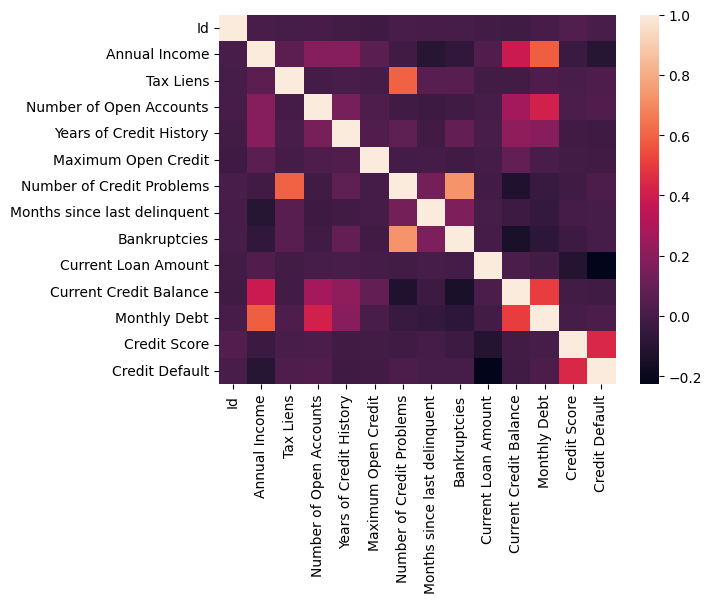

In [17]:
sns.heatmap(df.select_dtypes("number").corr())

### There is an issue of multicollinearity between Bankruptcies and Number of Credit Problems: One needs to be dropped

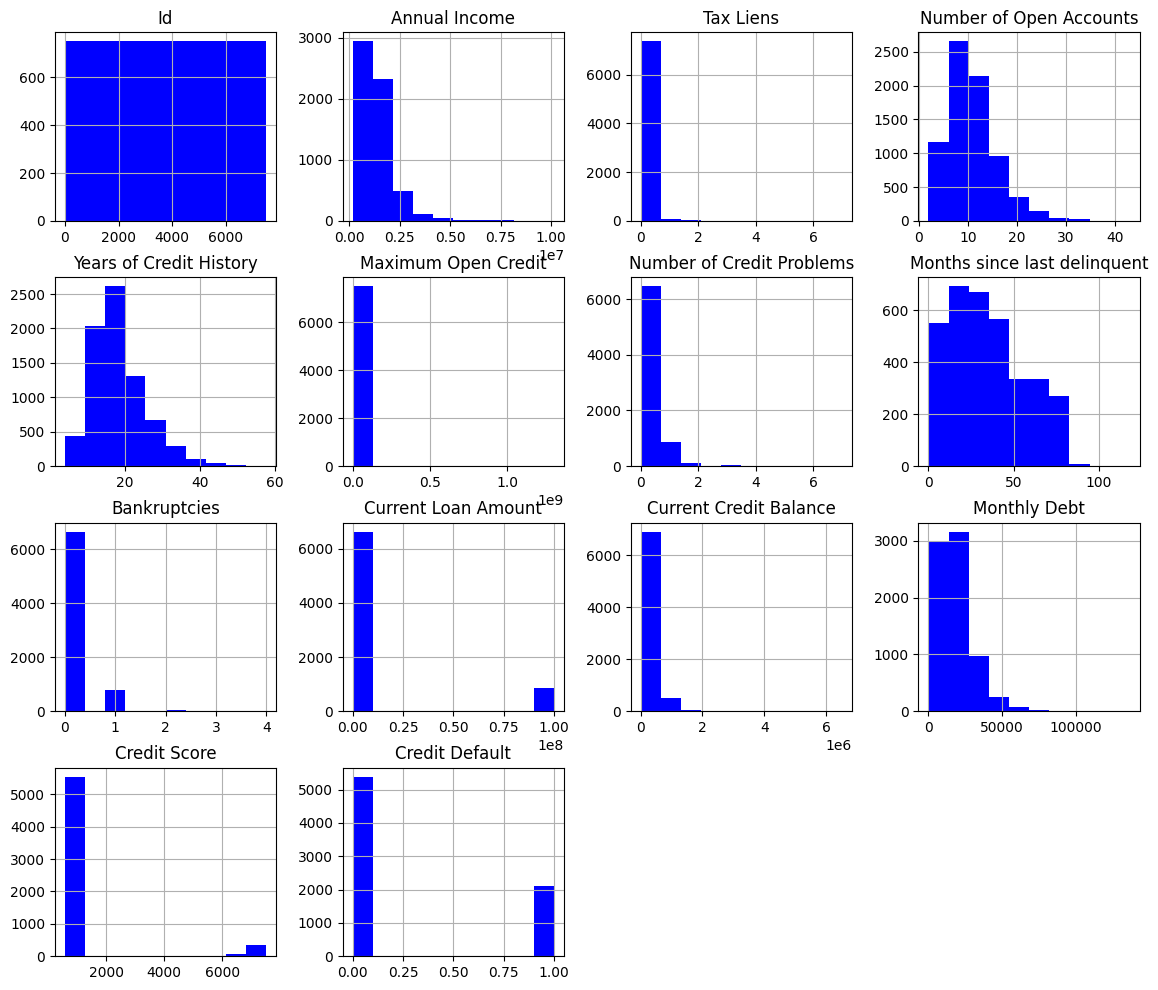

In [18]:
df.select_dtypes("number").hist(figsize=(14, 12), color='blue');

In [19]:
df.select_dtypes("object").head()

,Home Ownership,Years in current job,Purpose,Term
0,Own Home,NaN,debt consolidation,Short Term
1,Own Home,10+ years,debt consolidation,Long Term
2,Home Mortgage,8 years,debt consolidation,Short Term
3,Own Home,6 years,debt consolidation,Short Term
4,Rent,8 years,debt consolidation,Short Term


In [20]:
df["Home Ownership"].value_counts()

,count
Home Ownership,
Home Mortgage,3637
Rent,3204
Own Home,647
Have Mortgage,12


## Creating a function for wrangling data

In [21]:
# create a function for wrangling data
def wrangle(filepath):
  # Read the csv file
  df=pd.read_csv(filepath)
  # Drop the 'Id' column and the 'Bankruptcies' column(Muliticollinearity)
  df.drop(columns=["Id","Bankruptcies"],inplace=True)
  # Fill Missing Values
  df["Annual Income"]=df["Annual Income"].fillna(df["Annual Income"].median())
  df["Months since last delinquent"]=df["Months since last delinquent"].fillna(df["Months since last delinquent"].mean())
  df["Credit Score"]=df["Credit Score"].fillna(df["Credit Score"].median())
  df["Years in current job"]=df["Years in current job"].fillna(df["Years in current job"].mode()[0])
  # Group the 'Purpose' column to reduce High Cardinality
  rare_categories = df["Purpose"].value_counts()[df["Purpose"].value_counts() < 20].index
  df["Purpose"] = df["Purpose"].replace(rare_categories, "Other")
  # Drop Duplicates
  df.drop_duplicates(inplace=True)
  # Return the clean dataframe
  return df


## Applying the wrangle Function to the Data

In [22]:
df_clean=wrangle("train.csv")

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Purpose                       7500 non-null   object 
 10  Term                          7500 non-null   object 
 11  Current Loan Amount           7500 non-null   float64
 12  Current Credit Balance        7500 non-null   float64
 13  Mon

## Explalatory Data Analysis

In [24]:
## Explalatory Data Analysis

## Plotting Default Class structure

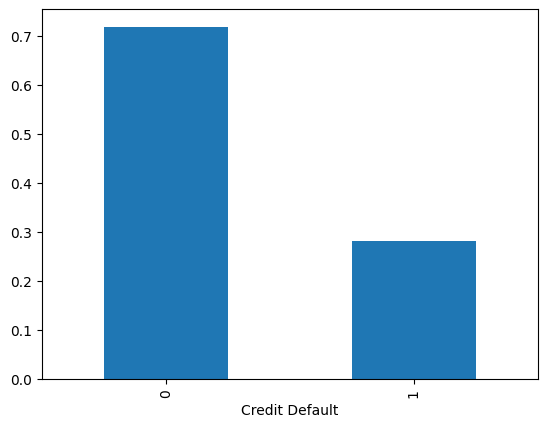

In [25]:
df_clean["Credit Default"].value_counts(normalize=True).plot(kind="bar");

In [26]:
majority_class_prop, minority_class_prop =df_clean['Credit Default'].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.7182666666666667 0.28173333333333334


## Buid Model


### Baseline Model

In [27]:
acc_baseline =majority_class_prop
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.72


In [28]:
## split the data

In [29]:
target="Credit Default"
y_train=df_clean[target]
X_train=df_clean.drop(columns=target)


In [30]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Purpose                       7500 non-null   object 
 10  Term                          7500 non-null   object 
 11  Current Loan Amount           7500 non-null   float64
 12  Current Credit Balance        7500 non-null   float64
 13  Mon

In [31]:
## read and clean th test Data

In [32]:
test_df=wrangle("test.csv")
test_df.head()


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,1178475.0,4 years,0.0,9.0,12.5,220968.0,0.0,70.000000,debt consolidation,Short Term,162470.0,105906.0,6813.0,731.0
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.000000,Other,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,34.181261,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.000000,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,34.181261,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [41]:
df1 = pd.read_csv("target.csv", nrows=2500)






In [42]:
y_test=df1["flag"]
X_test=test_df
y_test = y_test.iloc[:2500]
X_test = X_test.iloc[:2500]
y_test.info()


<class 'pandas.core.series.Series'>
RangeIndex: 2500 entries, 0 to 2499
Series name: flag
Non-Null Count  Dtype
--------------  -----
2500 non-null   int64
dtypes: int64(1)
memory usage: 19.7 KB


In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 2500 non-null   float64
 2   Years in current job          2500 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  2500 non-null   float64
 9   Purpose                       2500 non-null   object 
 10  Term                          2500 non-null   object 
 11  Current Loan Amount           2500 non-null   float64
 12  Current Credit Balance        2500 non-null   float64
 13  Mon

## Scaling The Data

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes("number"))
X_test_scaled = scaler.transform(X_test.select_dtypes("number"))


## Instantiate Model: Logistic Regression

In [46]:

model =make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=1000)
)

model.fit(X_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Home Ownership', 'Years in current job',
                                     'Purpose', 'Term'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [47]:
# get the test and trin accuracy
acc_train =accuracy_score(y_train,model.predict(X_train))
acc_test =model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.77
Test Accuracy: 0.88


In [48]:
y_train_pred_proba =model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[9.99740653e-01 2.59346954e-04]
 [5.91423281e-01 4.08576719e-01]
 [9.99863457e-01 1.36542585e-04]
 [7.14400570e-01 2.85599430e-01]
 [6.32539677e-01 3.67460323e-01]]


## Feature Importances

In [49]:
features =model.named_steps["onehotencoder"].get_feature_names()
importances =model.named_steps["logisticregression"].coef_[0]
feat_imp=pd.Series(np.exp(importances),index=features).sort_values()
feat_imp.head()

,0
Term_Short Term,0.734823
Purpose_debt consolidation,0.902760
Home Ownership_Home Mortgage,0.924377
Years of Credit History,0.974266
Years in current job_< 1 year,0.979569


In [50]:
#Get Odds Ratios
odds_ratios=feat_imp
odds_ratios.head()

,0
Term_Short Term,0.734823
Purpose_debt consolidation,0.902760
Home Ownership_Home Mortgage,0.924377
Years of Credit History,0.974266
Years in current job_< 1 year,0.979569


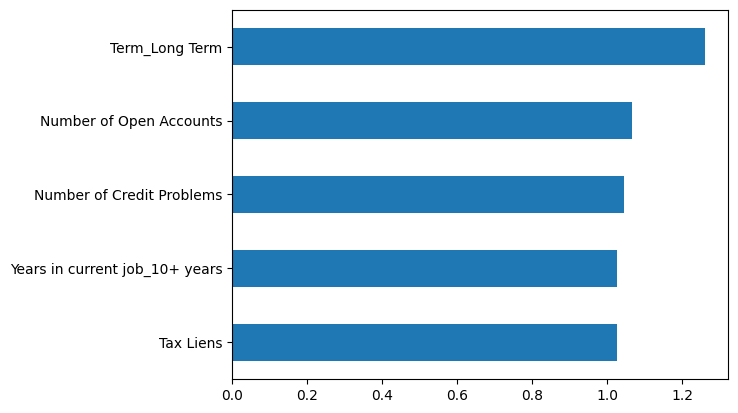

In [51]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind="barh");

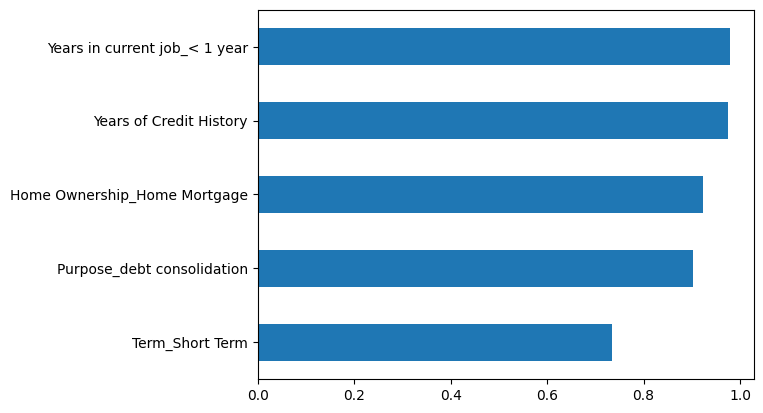

In [52]:
# Horizontal bar chart, five smallest coefficients
odds_ratios.head().plot(kind="barh");

# Decision Tree

In [53]:

model_t =make_pipeline(
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),DecisionTreeClassifier(max_depth=5,random_state=42)
)
model_t.fit(X_train,y_train)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [54]:
#Get the train and test Accuracy score
acc_train_t =model_t.score(X_train,y_train)
acc_test_t =model_t.score(X_test,y_test)

print("Training Accuracy:", round(acc_train_t, 2))
print("Validation Accuracy:", round(acc_test_t, 2))

Training Accuracy: 0.77
Validation Accuracy: 0.74


## Tune Hyperparameter:Tree Depth

In [55]:
tree_depth =model_t.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 5


In [56]:
depth_hyperparams =range(1,10)

In [57]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model =make_pipeline(OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
                             DecisionTreeClassifier(max_depth=d,random_state=42)
                             )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_test,y_test))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.7716, 0.7716, 0.7716]
Validation Accuracy Scores: [0.91, 0.91, 0.91]


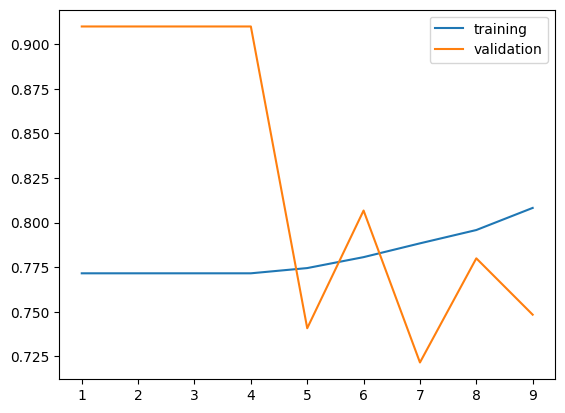

In [58]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams,training_acc,label='training')
plt.plot(depth_hyperparams,validation_acc,label='validation')
plt.legend();


## From the plot , it looks like the model perfoms well with a depth of 5

In [59]:
test_model =make_pipeline(OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
                             DecisionTreeClassifier(max_depth=5,random_state=42)
                             )
# Fit model to training data
test_model.fit(X_train, y_train)
# Calculate training accuracy score
training_acc=test_model.score(X_train,y_train)
# Calculate validation accuracy score
validation_acc=test_model.score(X_test,y_test)

print("Training Accuracy Scores:", training_acc)
print("Validation Accuracy Scores:", validation_acc)

Training Accuracy Scores: 0.7745333333333333
Validation Accuracy Scores: 0.7408


### Model Accuracy remained the same meaning that the depth parameter is good.

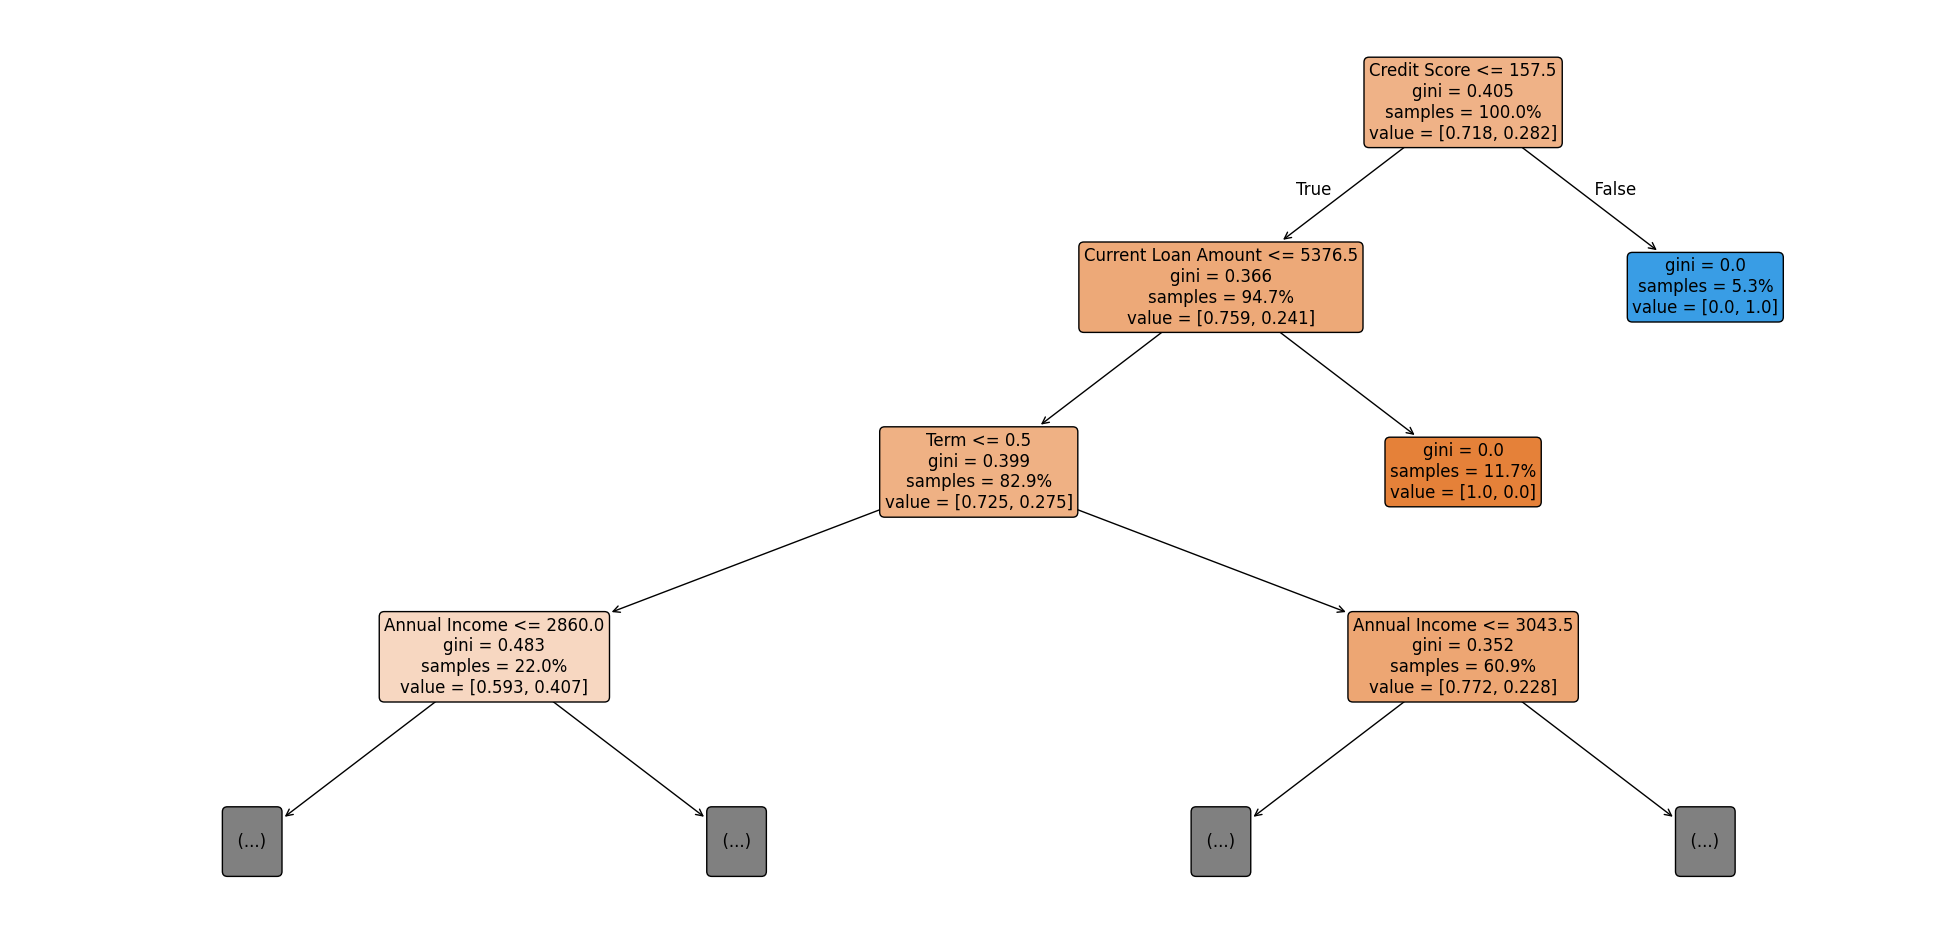

In [61]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=test_model.named_steps['decisiontreeclassifier'],
    feature_names=list(X_train.columns),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [63]:
features =X_train.columns
importances =test_model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['Home Ownership', 'Annual Income', 'Years in current job'], dtype='object')
Importances: [0.         0.07188863 0.        ]


## Get Feature Importances

In [64]:
feat_imp =pd.Series(importances,index=features).sort_values()
feat_imp.head()

,0
Home Ownership,0.0
Years in current job,0.0
Tax Liens,0.0
Number of Open Accounts,0.0
Maximum Open Credit,0.0


<Axes: >

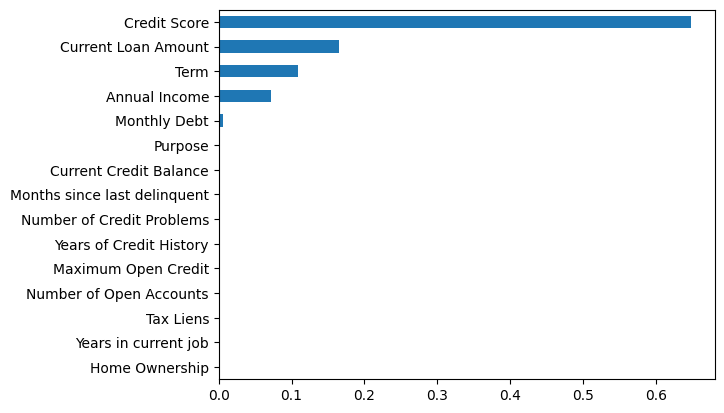

In [65]:
# Create horizontal bar chart
feat_imp.plot(kind="barh")

# Conclusion

### Looking at the perfomance of the two models, we see that the Logistic regression model does a better job at predicting 'Credit Default' with an accuracy score of of 0.88 whilst that of the decsion tree is 0.74